Here the analysis was done based on data preprrocessing techniques and scaling methods to get the best model by going throgh KMeans clusterin, Mean Shift clustering and Hierarchical clustering

* Data Preprocessig
    * Drop unwanted column
    * Get the summary of the dataset
    * Missing values handling
    * Duplicate values handling
    * Distrribution of the data 
    * Outlier handling
        * Replace the outliers from median value of the relevant column
        * Without outlier handling
        * Removing outliers
    * Feature Scaling
        * Standardizing
        * Normalizing
* Modeling
    * KMeans
    * Mean Shift
    * Hierarchical

In [1]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

### 1) Import Libraries

In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # MATLAB-like way of plotting
from matplotlib.colors import Normalize
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# sklearn package for machine learning in python:
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# For Hierarchical Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
plt.style.use("ggplot")
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

### 2) Data Preprocessing

#### 2.1) Importing Dataset

In [3]:
df = pd.read_csv('country_data.csv') 
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### 2.2) Drop the unusual columns

* Check number of unique values in 'country' column

In [4]:
# Count the number of unique classes
num_classes = df['country'].nunique()

# List the unique classes
unique_classes = df['country'].unique()

print(f"Number of unique classes: {num_classes}")
print(f"Unique classes: {unique_classes}")

Number of unique classes: 167
Unique classes: ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kuwait' 'Kyrgyz Republic' '

It's difficult to get the information from the 'country' column. So, we have to remove that column

In [5]:
# remove 'country' variable
data = df.iloc[:,1:11]

#### 2.3) Get the brief summary of the dataset

* Statistical summary

In [6]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


* Informational summary

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


#### 2.4) Missing value handling

In [8]:
missing_values = data.isna()

# Calculate the count of missing values in each column
missing_count = missing_values.sum()

# Calculate the percentage of missing values in each column
missing_percentage = (missing_count / len(df)) * 100

# Create a summary DataFrame
missing_info = pd.DataFrame({'Missing Values': missing_count, 'Missing Percentage': missing_percentage})

# Print or display the summary
print(missing_info)


            Missing Values  Missing Percentage
child_mort               0                 0.0
exports                  0                 0.0
health                   0                 0.0
imports                  0                 0.0
income                   0                 0.0
inflation                0                 0.0
life_expec               0                 0.0
total_fer                0                 0.0
gdpp                     0                 0.0


* Visualizing the missing values

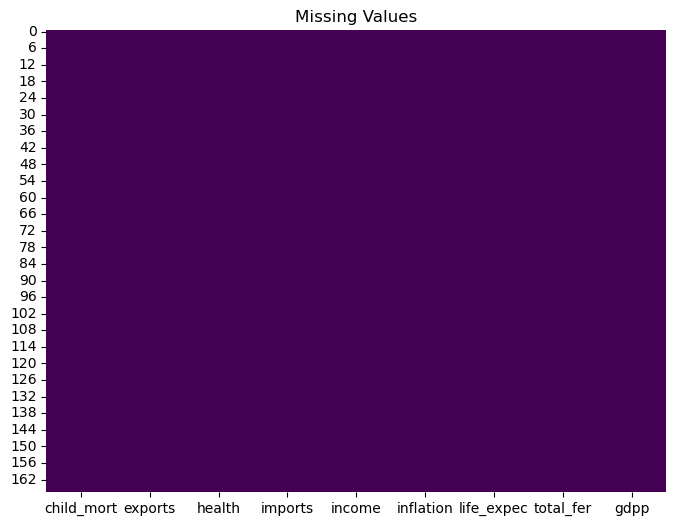

In [9]:
# Create a heatmap to visualize missing values
plt.figure(figsize=(8, 6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values')
plt.show()

There are not missing values in the dataset

#### 2.5) Duplicate value handling

In [10]:
duplicate_rows = data[data.duplicated(keep='first')]
# first occurrence of the duplicate and marks the rest as duplicates.
num_duplicate_rows = len(duplicate_rows)

print(f"Number of duplicate rows: {num_duplicate_rows}")

Number of duplicate rows: 0


#### 2.6) Data distribution of the variables

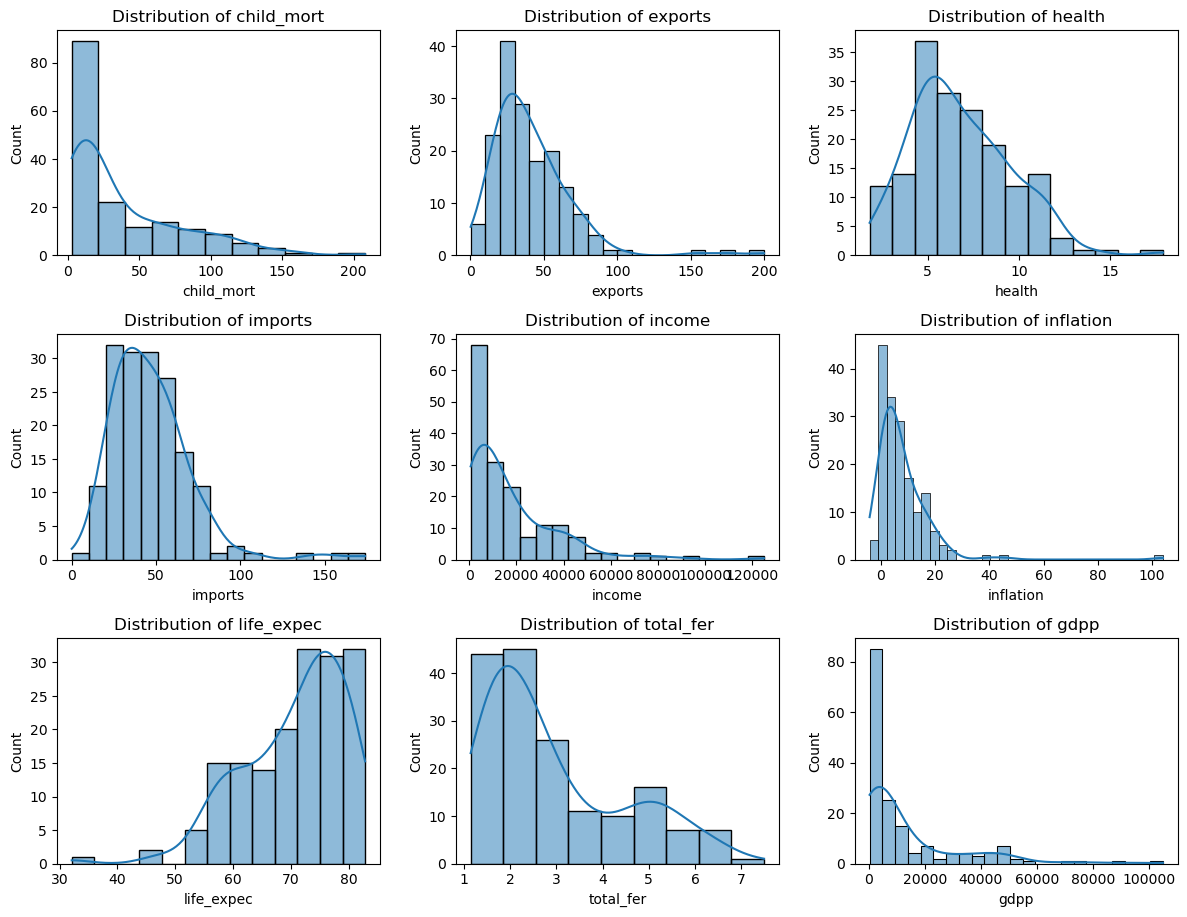

In [11]:
# Create subplots for each variable
plt.figure(figsize=(12, 21))  # Adjust the figure size as needed
for i, column in enumerate(data.columns):
    plt.subplot(7, 3, i + 1)  # Adjust the subplot layout as needed
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

#### 2.7) Outlier handling

child_mort        Axes(0.125,0.77;0.168478x0.11)
exports        Axes(0.327174,0.77;0.168478x0.11)
health         Axes(0.529348,0.77;0.168478x0.11)
imports        Axes(0.731522,0.77;0.168478x0.11)
income           Axes(0.125,0.638;0.168478x0.11)
inflation     Axes(0.327174,0.638;0.168478x0.11)
life_expec    Axes(0.529348,0.638;0.168478x0.11)
total_fer     Axes(0.731522,0.638;0.168478x0.11)
gdpp             Axes(0.125,0.506;0.168478x0.11)
dtype: object

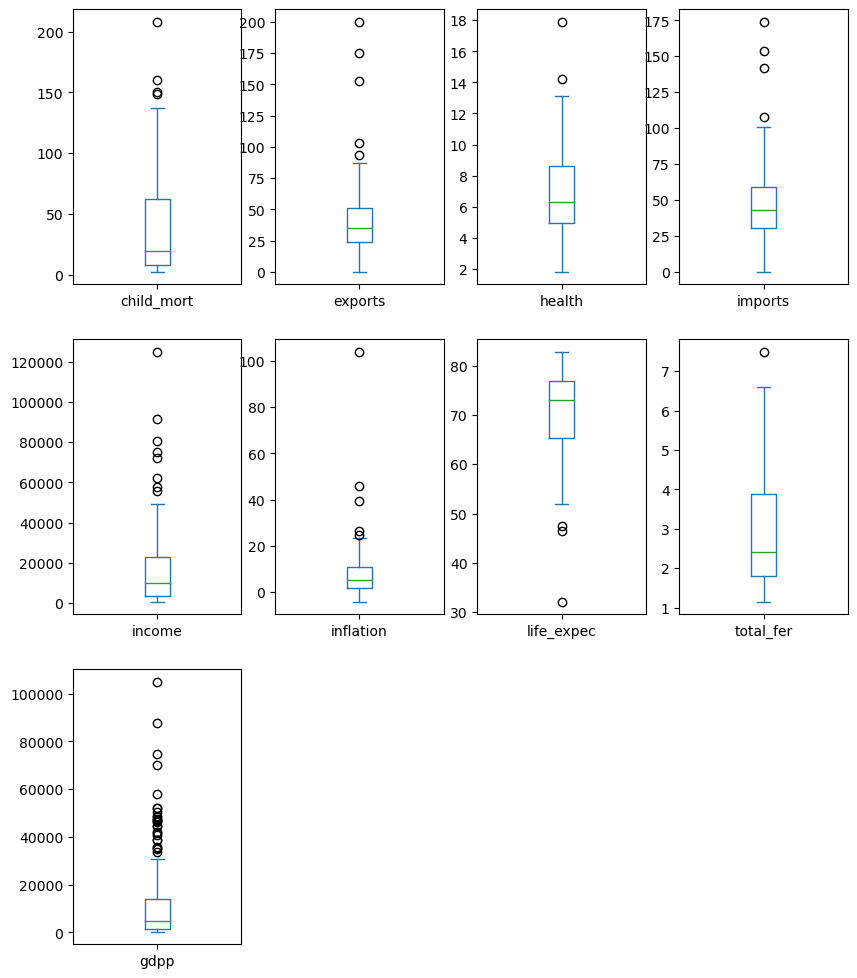

In [12]:
data.iloc[:,0:10].plot(kind="box", subplots=True, layout=(6,4), figsize=(10,25))

There are outliers in each variable

* Take the percentage of outliers in each variable

In [13]:
# Define a function to calculate the percentage of outliers
def percentage_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers) / len(series) * 100

# Calculate the percentage of outliers for each variable
outlier_percentages = data.apply(percentage_outliers)

# Display the result
print(outlier_percentages)


child_mort     2.395210
exports        2.994012
health         1.197605
imports        2.395210
income         4.790419
inflation      2.994012
life_expec     1.796407
total_fer      0.598802
gdpp          14.970060
dtype: float64


* Replace the outliers with median value

In [14]:
# replace the outliers with median value
def replace_outliers_with_median(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    median_value = series.median()
    series[(series < lower_bound) | (series > upper_bound)] = median_value
    return series

# Apply the function to replace outliers for each variable
data_new = data.apply(replace_outliers_with_median)

child_mort        Axes(0.125,0.77;0.168478x0.11)
exports        Axes(0.327174,0.77;0.168478x0.11)
health         Axes(0.529348,0.77;0.168478x0.11)
imports        Axes(0.731522,0.77;0.168478x0.11)
income           Axes(0.125,0.638;0.168478x0.11)
inflation     Axes(0.327174,0.638;0.168478x0.11)
life_expec    Axes(0.529348,0.638;0.168478x0.11)
total_fer     Axes(0.731522,0.638;0.168478x0.11)
gdpp             Axes(0.125,0.506;0.168478x0.11)
dtype: object

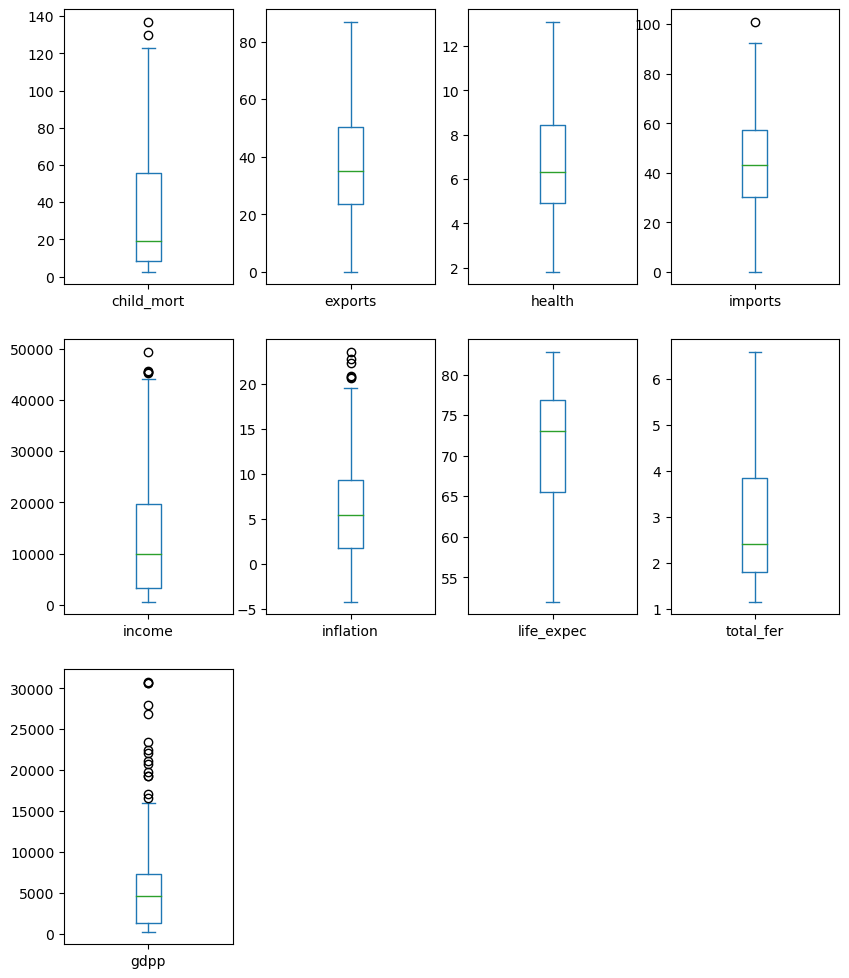

In [15]:
data_new.iloc[:,0:10].plot(kind="box", subplots=True, layout=(6,4), figsize=(10,25))

There are only few outliers in the dataset after doing the outlier treatment

* Removing the outliers

In [ ]:
""""
data_new = data.iloc[:,:]

def outliers_for_features(data, col):    
    Q1 = data.loc[:,col].quantile(0.25)
    Q3 = data.loc[:,col].quantile(0.75)
    
    upper_limit = Q3 + 1.5*(Q3-Q1)
    lower_limit = Q1 - 1.5*(Q3-Q1)
    
    return data_new[col].apply(lambda x : upper_limit if x > upper_limit else lower_limit if x < lower_limit else x)
    
for col in df.iloc[:,1:10]:
    data_new[col] = outliers_for_features(data, col)

""""

#### 2.8) Correlation analysis

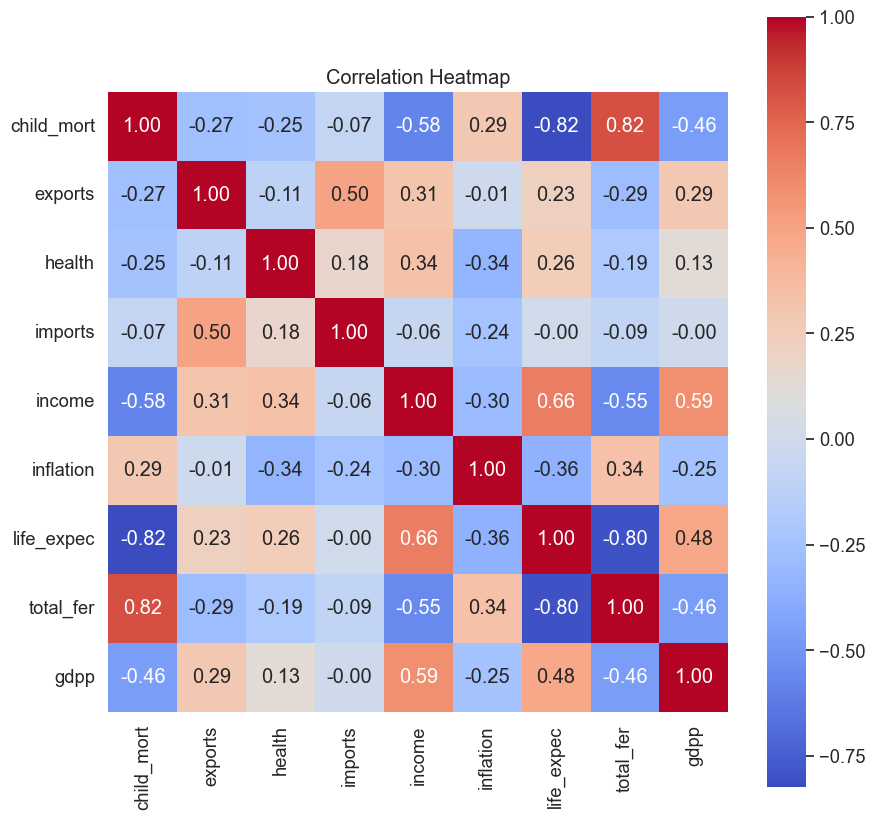

In [16]:
corr_matrix = data_new.corr()

# Create a heatmap
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.2)  # Adjust font size for better readability

# Create a heatmap with the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

# Customize the plot
plt.title("Correlation Heatmap")
plt.show()

Following feature pairs are highly correlated (positively or negatively)

* child_mort and total_fer = 0.82
* child_mort and life_expec = -0.82
* life_expec and total_fer = -0.8
* income and life_expec = 0.66
* income and gdpp = 0.59
* exports and imports = 0.5
* life expec and inflation = -0.36
* health and income = 0.34 / health and inflation = -0.34

#### 2.9) Feature scaling

* Standardizing

In [17]:
# scale the dataset
X_std = StandardScaler().fit_transform(data_new)

* Normalizing

In [18]:
X_nor = MinMaxScaler().fit_transform(data_new)

### 3) Modeling

#### 3.1) Standardize data modeling

#### 3.1.1) KMeans Clustering

* Find the best k value from lbow method

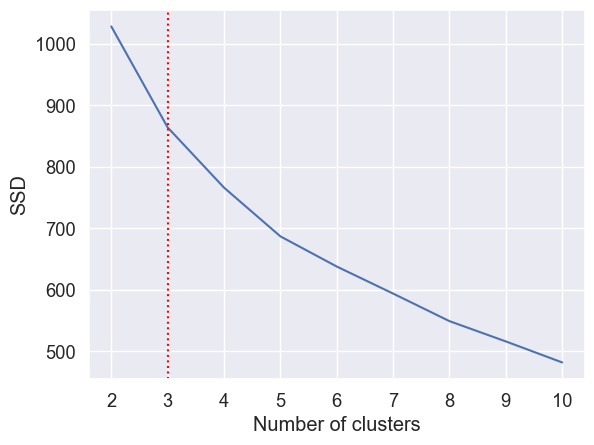

In [19]:
# Elbow curve-ssd
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(X_std)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
ax = plt.axes()
ax.plot(temp[0], temp[1]) # plot the SSDs for each n_clusters
ax.axvline(3, ls='dotted',color='red') # elbow formed as 3
plt.xlabel('Number of clusters')
plt.ylabel('SSD')
plt.show()

* According to the elbow method let's take k = 3

In [20]:
km_std = KMeans(n_clusters = 3, n_init='auto', random_state=5)
km_std.fit(X_std)

KMeans(n_clusters=3, n_init='auto', random_state=5)

In [21]:
cluster_centers_km_std = km_std.cluster_centers_

# print the centre positions of the clusters
centers_km_std = km_std.cluster_centers_
print('Centroids:', centers_km_std, '\n')

Centroids: [[ 1.2657597  -0.53686481 -0.25196015 -0.27954618 -0.7768619   0.47427573
  -1.22438215  1.24315009 -0.64481691]
 [-0.79113721  0.0702085   0.83922494 -0.28247802  1.22696446 -0.52909303
   0.98601005 -0.74078945  0.91886473]
 [-0.3788123   0.33258661 -0.36628648  0.37987744 -0.24784887  0.00879567
   0.22341754 -0.39550972 -0.14122439]] 



In [22]:
cluster_labels_km_std = km_std.fit_predict(X_std)
silhouette_avg_km_std = silhouette_score(X_std, cluster_labels_km_std)
print(f"Silhouette Score: {silhouette_avg_km_std}")

Silhouette Score: 0.20971239709860126


#### 3.1.2) Mean Shift

In [23]:
# fit the model
ms_std = MeanShift()
ms_std.fit(X_std)

MeanShift()

In [24]:
cluster_centers_ms_std = ms_std.cluster_centers_

# print the centre positions of the clusters
centers_ms_std = ms_std.cluster_centers_
print('Centroids:', centers_ms_std, '\n')

Centroids: [[-0.39007824  0.11406691 -0.02685058  0.06034844  0.02059947 -0.12617977
   0.29430355 -0.39463756 -0.05724476]
 [ 2.19835272  2.51450119 -0.87535042  0.78853616  1.53938076 -0.1862772
  -1.28767027  1.56152314  1.67830622]] 



In [25]:
cluster_labels_ms_std = ms_std.fit_predict(X_std)
silhouette_avg_ms_std = silhouette_score(X_std, cluster_labels_ms_std)
print(f"Silhouette Score: {silhouette_avg_ms_std}")

Silhouette Score: 0.2251938477207361


#### 3.1.3) Hierarchical Clustering

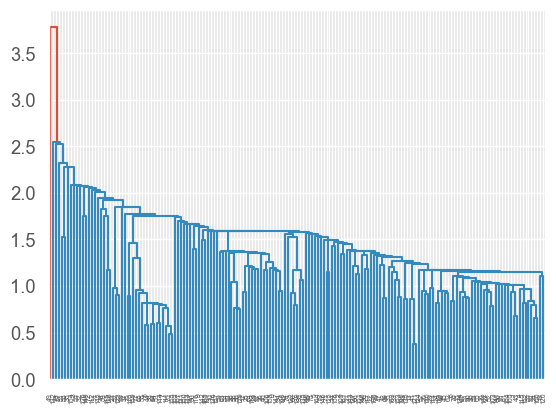

In [44]:
### Hierarchical Clustering from 'single' method
single_h_std = linkage(X_std, method="single", metric='euclidean')
dendrogram(single_h_std)
plt.show()

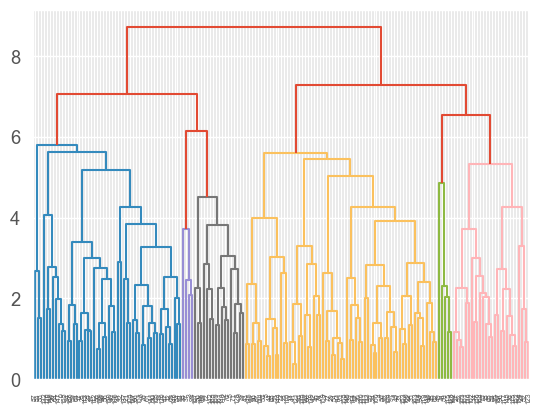

In [45]:
### Hierarchical Clustering
complete_h_std = linkage(X_std, method="complete", metric='euclidean')
dendrogram(complete_h_std)
plt.show()

In [46]:
# Apply Agglomerative Clustering
agg_clustering_std = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels_std = agg_clustering_std.fit_predict(X_std)

# Calculate Silhouette Score
silhouette_avg_std = silhouette_score(X_std, labels_std)
print(f"Silhouette Score: {silhouette_avg_std}")

Silhouette Score: 0.16433137959686053


#### 3.2) Normalized data modeling

#### 3.2.1) KMeans Clustering

* Find the best k value using lbow method

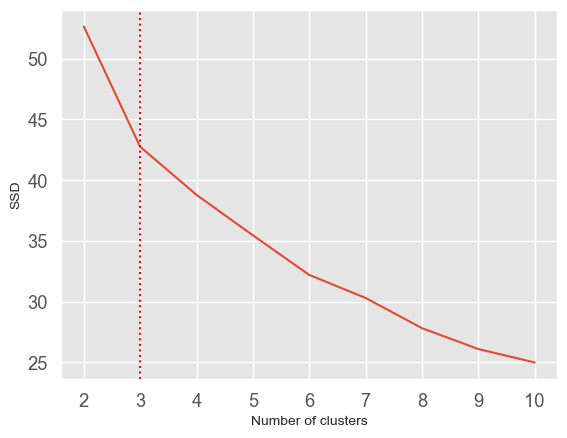

In [33]:
# Elbow curve-ssd
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(X_nor)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
ax = plt.axes()
ax.plot(temp[0], temp[1]) # plot the SSDs for each n_clusters
ax.axvline(3, ls='dotted',color='red') # elbow formed as 3
plt.xlabel('Number of clusters')
plt.ylabel('SSD')
plt.show()

Let's take k=3 or the optimal value for k

In [69]:
km_nor = KMeans(n_clusters = 3, n_init='auto', random_state=5)
km_nor.fit(X_nor)

KMeans(n_clusters=3, n_init='auto', random_state=5)

In [70]:
cluster_centers_km_nor = km_nor.cluster_centers_

# print the centre positions of the clusters
centers_km_nor = km_nor.cluster_centers_
print('Centroids:', centers_km_nor, '\n')

Centroids: [[0.57361516 0.33243784 0.39977585 0.41674733 0.0675777  0.47911484
  0.29949642 0.67819628 0.05433476]
 [0.02693791 0.51243897 0.60230292 0.44468718 0.62766047 0.23492694
  0.87359799 0.11568349 0.41090053]
 [0.14380228 0.45566345 0.35445144 0.45237215 0.19723232 0.4124197
  0.68273956 0.21539646 0.15219181]] 



In [71]:
cluster_labels_km_nor = km_nor.fit_predict(X_nor)
silhouette_avg_km_nor = silhouette_score(X_nor, cluster_labels_km_nor)
print(f"Silhouette Score: {silhouette_avg_km_nor}")

Silhouette Score: 0.2413591589911318


#### 3.2.2) Mean Shift

In [37]:
# fit the model
ms_nor = MeanShift()
ms_nor.fit(X_nor)

MeanShift()

In [38]:
cluster_centers_ms_nor = ms_nor.cluster_centers_

# print the centre positions of the clusters
centers_ms_nor = ms_nor.cluster_centers_
print('Centroids:', centers_ms_nor, '\n')

Centroids: [[0.13806779 0.47223735 0.41173132 0.4620637  0.2536404  0.37089927
  0.68966713 0.20866648 0.19594062]
 [0.80654762 0.98732587 0.23649247 0.58289617 0.67821934 0.34519957
  0.28896104 0.74632353 0.55183356]] 



In [39]:
cluster_labels_ms_nor = ms_nor.fit_predict(X_nor)
silhouette_avg_ms_nor = silhouette_score(X_nor, cluster_labels_ms_nor)
print(f"Silhouette Score: {silhouette_avg_ms_nor}")

Silhouette Score: 0.25206216837524525


#### 3.2.3) Hierarchical Clustering

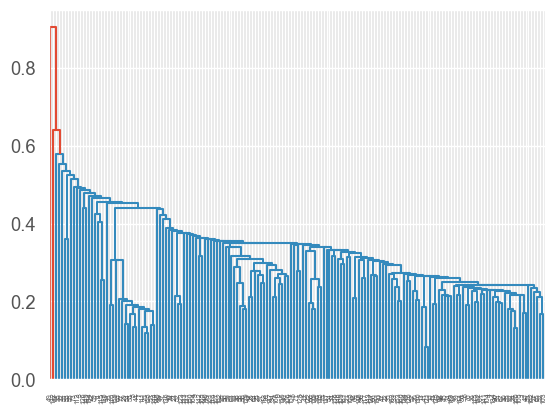

In [41]:
### Hierarchical Clustering from 'single' method
single_h_nor = linkage(X_nor, method="single", metric='euclidean')
dendrogram(single_h_nor)
plt.show()

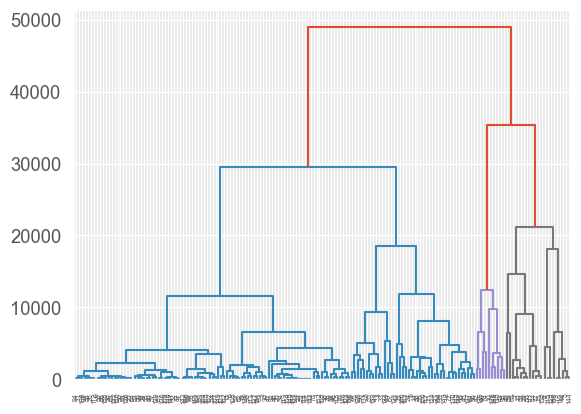

In [42]:
### Hierarchical Clustering
complete_h_nor = linkage(data, method="complete", metric='euclidean')
dendrogram(complete_h_nor)
plt.show()

In [43]:
# Apply Agglomerative Clustering
agg_clustering_nor = AgglomerativeClustering(n_clusters=6, linkage='complete')
labels_nor = agg_clustering_nor.fit_predict(X_nor)

# Calculate Silhouette Score
silhouette_avg_nor = silhouette_score(X_nor, labels_nor)
print(f"Silhouette Score: {silhouette_avg_nor}")

Silhouette Score: 0.1504543376685483


#### 3.3) Without Scaling

#### 3.3.1) KMeans Clustering

* Find the best k value using elbow method

In [58]:
X = data_new.values

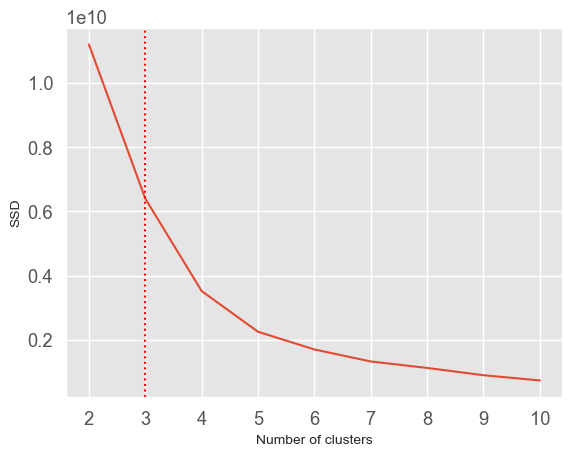

In [59]:
# Elbow curve-ssd
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(X)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
ax = plt.axes()
ax.plot(temp[0], temp[1]) # plot the SSDs for each n_clusters
ax.axvline(3, ls='dotted',color='red') # elbow formed as 3
plt.xlabel('Number of clusters')
plt.ylabel('SSD')
plt.show()

In [78]:
km_non = KMeans(n_clusters = 3, n_init='auto', random_state=5)
km_non.fit(X)

KMeans(n_clusters=3, n_init='auto', random_state=5)

In [79]:
cluster_centers_km_non = km_non.cluster_centers_

# print the centre positions of the clusters
centers_km_non = km_non.cluster_centers_
print('Centroids:', centers_km_non, '\n')

Centroids: [[4.79396226e+01 3.37867830e+01 6.16877358e+00 4.53308104e+01
  5.77587736e+03 7.69487736e+00 6.78735849e+01 3.47509434e+00
  2.69616981e+03]
 [1.05666667e+01 4.39619048e+01 8.91857143e+00 4.06714286e+01
  4.07523810e+04 3.18190476e+00 7.91380952e+01 2.10190476e+00
  7.41047619e+03]
 [1.24450000e+01 4.52700000e+01 6.93950000e+00 4.41675000e+01
  2.13700000e+04 5.08847500e+00 7.54875000e+01 1.86825000e+00
  1.43875000e+04]] 



In [80]:
cluster_labels_km_non = km_non.fit_predict(X)
silhouette_avg_km_non = silhouette_score(X, cluster_labels_km_non)
print(f"Silhouette Score: {silhouette_avg_km_non}")

Silhouette Score: 0.6162808915801377


#### 3.3.2) Mean Shift

In [63]:
# fit the model
ms_non = MeanShift()
ms_non.fit(X)

MeanShift()

In [64]:
cluster_centers_ms_non = ms_non.cluster_centers_

# print the centre positions of the clusters
centers_ms_non = ms_non.cluster_centers_
print('Centroids:', centers_ms_non, '\n')

Centroids: [[4.86980769e+01 3.37615288e+01 6.09500000e+00 4.52631337e+01
  5.62733654e+03 7.76429808e+00 6.76711538e+01 3.50644231e+00
  2.60494231e+03]
 [4.40588235e+00 3.83882353e+01 1.00458824e+01 3.94176471e+01
  4.06058824e+04 1.24647059e+00 8.08117647e+01 1.81823529e+00
  4.66000000e+03]
 [1.40916667e+01 4.78750000e+01 8.20583333e+00 4.84166667e+01
  2.91166667e+04 1.27591667e+00 7.75833333e+01 1.90500000e+00
  2.41333333e+04]
 [3.67500000e+01 6.76500000e+01 4.12750000e+00 4.60000000e+01
  4.13750000e+04 1.14075000e+01 7.20250000e+01 3.30750000e+00
  1.91000000e+04]] 



In [65]:
cluster_labels_ms_non = ms_non.fit_predict(X)
silhouette_avg_ms_non = silhouette_score(X, cluster_labels_ms_non)
print(f"Silhouette Score: {silhouette_avg_ms_non}")

Silhouette Score: 0.6081182138462882


#### 3.3.3) Hierachical Clustering

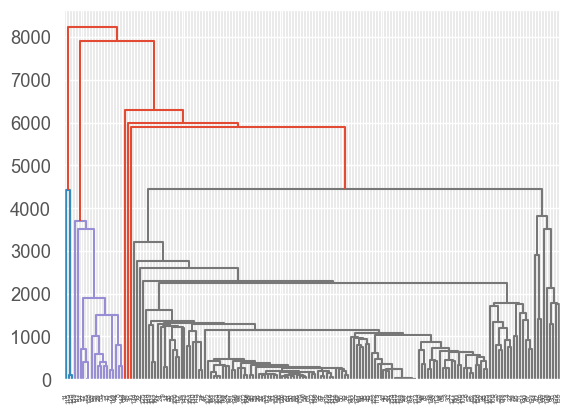

In [66]:
### Hierarchical Clustering from 'single' method
single_h = linkage(X, method="single", metric='euclidean')
dendrogram(single_h)
plt.show()

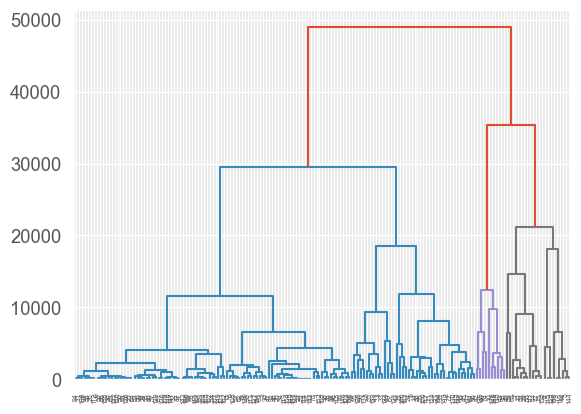

In [67]:
### Hierarchical Clustering
complete_h = linkage(X, method="complete", metric='euclidean')
dendrogram(complete_h)
plt.show()

In [68]:
# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=6, linkage='complete')
labels = agg_clustering.fit_predict(X)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.47918965259605745
